In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import os

In [2]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [3]:
os.chdir(r'G:\My Drive\Master\Documents\Academia\Columbia-Postgraduate\QMSS\Res_unit_1\Time series\Assignments\Lab 3')
gss = pd.read_csv("trends-gss.csv")
variables = ["year", "sex", "age", "degree", "madeg", "race", "partyid", "realinc", "confinan"]
sub = gss[variables].copy()

In [4]:
sub['nconfinan'] = np.where(sub['confinan'] == 1, 1, 0)
sub['baplus'] = np.where(sub['degree'] >= 3, 1, 0)
sub['mbaplus'] = np.where(sub['madeg'] >= 3, 1, 0)
sub['nrace'] = np.where(sub['race'] == 1, 1, 0)
sub['income'] = sub['realinc']

In [5]:
by_year = sub.groupby('year', as_index = False).agg('mean').replace({0.000000: np.nan})

In [6]:
add_years_df = pd.DataFrame(data = pd.Series([1979, 1981, 1992, 1995] + list(np.arange(1997, 2009, 2))),
                            columns = ['year'])
                            
by_year = pd.concat([by_year, add_years_df], sort = False, ignore_index = True)

In [7]:
by_year = by_year.sort_values('year')
by_year = by_year.set_index("year", drop = False)

# Interpolate missing values of time series linearly
by_year_ts = by_year.interpolate(method = 'linear')

In [8]:
by_year_ts['confinan_pct'] = by_year_ts['nconfinan']*100
by_year_ts['ba_pct'] = by_year_ts['baplus']*100
by_year_ts['mba_pct'] = by_year_ts['mbaplus']*100

In [9]:
corr_vars = ['confinan_pct', 'ba_pct', 'mba_pct', 'age','race', 'income', 'year']
by_year_ts[corr_vars].corr()

,confinan_pct,ba_pct,mba_pct,age,race,income,year
confinan_pct,1.000000,-0.840768,-0.769148,-0.680831,-0.603893,-0.478022,-0.823630
ba_pct,-0.840768,1.000000,0.953986,0.812950,0.766796,0.676960,0.977415
mba_pct,-0.769148,0.953986,1.000000,0.779575,0.769211,0.664868,0.954476
age,-0.680831,0.812950,0.779575,1.000000,0.738359,0.532060,0.859790
race,-0.603893,0.766796,0.769211,0.738359,1.000000,0.388955,0.842938
income,-0.478022,0.676960,0.664868,0.532060,0.388955,1.000000,0.635920
year,-0.823630,0.977415,0.954476,0.859790,0.842938,0.635920,1.000000


<AxesSubplot:>

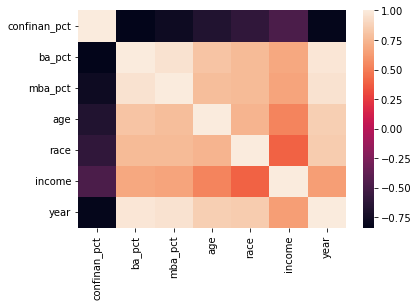

In [10]:
sns.heatmap(by_year_ts[corr_vars].corr())

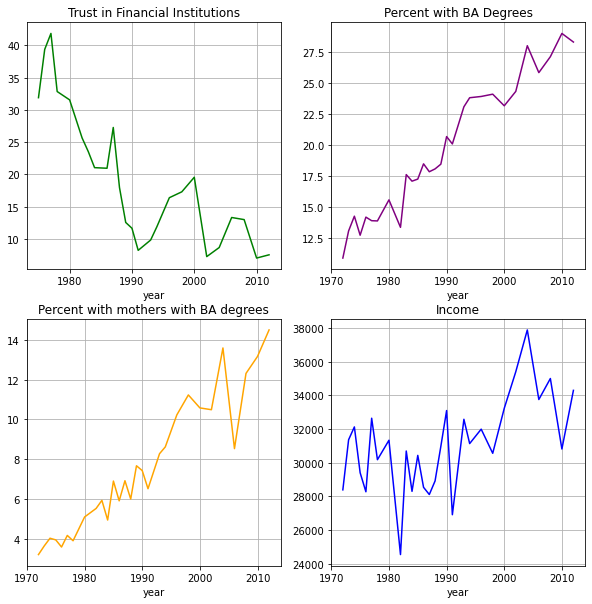

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

by_year_ts['confinan_pct'].plot(title = 'Trust in Financial Institutions', color = 'g', ax = axes[0,0], grid = True)
by_year_ts['ba_pct'].plot(title = 'Percent with BA Degrees', color = 'purple', ax = axes[0,1], grid = True)
by_year_ts['mba_pct'].plot(title = 'Percent with mothers with BA degrees', color = 'orange', ax = axes[1,0], grid = True)
by_year_ts['income'].plot(title = 'Income', color = 'b', ax = axes[1,1], grid = True)


plt.show()

In [12]:
lm_confinan = smf.ols('confinan_pct ~ ba_pct', data = by_year_ts).fit()
lm_confinan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           confinan_pct   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     82.00
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.39e-10
Time:                        20:46:48   Log-Likelihood:                -109.60
No. Observations:                  36   AIC:                             223.2
Df Residuals:                      34   BIC:                             226.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.4565      3.856     13.604      0.000      44.620      60.293
ba_pct        -1.6194      0.179     -9.055      0.000      -1.983      -1.256
==============================================================================
Omnibus:                        0.563   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.240
Skew:                          -0.200   Prob(JB):                        0.887
Kurtosis:                       3.016   Cond. No.                         95.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lm_confinan2 = smf.ols('confinan_pct ~ ba_pct + year', data = by_year_ts).fit()
lm_confinan2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           confinan_pct   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     39.86
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.58e-09
Time:                        20:46:48   Log-Likelihood:                -109.58
No. Observations:                  36   AIC:                             225.2
Df Residuals:                      33   BIC:                             229.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    197.5976    730.823      0.270      0.789   -1289.274    1684.469
ba_pct        -1.4624      0.811     -1.804      0.080      -3.112       0.187
year          -0.0745      0.375     -0.199      0.844      -0.838       0.689
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   0.580
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.252
Skew:                          -0.205   Prob(JB):                        0.881
Kurtosis:                       2.978   Cond. No.                     1.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from statsmodels.compat import lzip
name = ['BP', 'p-value', 'f-value', 'f p-value']

test2 = sm.stats.diagnostic.het_breuschpagan(lm_confinan2.resid, lm_confinan2.model.exog)
lzip(name, test2)

[('BP', 3.2172303930836432),
 ('p-value', 0.2001646108831657),
 ('f-value', 1.6192744579665),
 ('f p-value', 0.21338398575201292)]

In [15]:
from statsmodels.tsa.stattools import acf

err2 = lm_confinan2.resid
acf(err2)

array([ 1.        ,  0.70906792,  0.40926699,  0.2807529 ,  0.08174912,
       -0.13815214, -0.13615833, -0.05975335, -0.09371649, -0.05285333,
        0.02522436, -0.06275414, -0.2445408 , -0.28610065, -0.38523212,
       -0.45903008])

C:\Users\sande\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


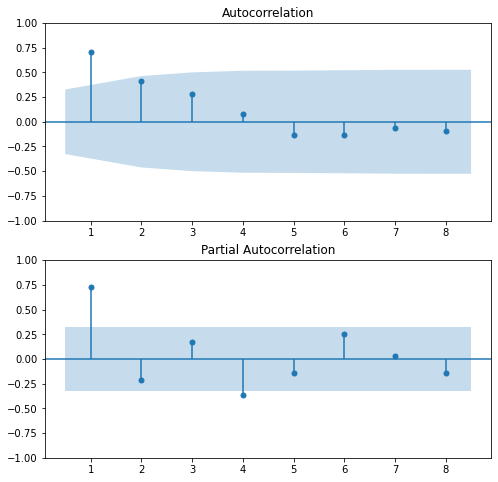

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(err2, lags = 8, zero = False, ax=ax[0]);
plot_pacf(err2, lags = 8, zero = False, ax=ax[1]);
plt.show()

In [17]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

print('Durbin Watson statistic:', durbin_watson(err2))

lmtest2, pval2, fval2, f_pval2 = acorr_breusch_godfrey(lm_confinan2, nlags = 1)
print('LM test =', lmtest2)
print('p-value =', pval2)

Durbin Watson statistic: 0.5801840620930963
LM test = 22.2386171492112
p-value = 2.4078197219514623e-06


In [18]:
from rpy2.robjects.packages import importr

car = importr('car')
stats = importr('stats')

%load_ext rpy2.ipython

Unable to determine R home: [WinError 2] The system cannot find the file specified
C:\Users\sande\anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [19]:
%%R -i by_year_ts

# refit the model using lm function from R
lm_confinan2_r = lm(confinan_pct ~ ba_pct + year, data = by_year_ts)

# pass the model to function
durbinWatsonTest(lm_confinan2_r, max.lag = 5)

 lag Autocorrelation D-W Statistic p-value
   1      0.70906792     0.5801841   0.000
   2      0.40926699     1.0747301   0.004
   3      0.28075290     1.1565035   0.016
   4      0.08174912     1.5295757   0.324
   5     -0.13815214     1.9459934   0.664
 Alternative hypothesis: rho[lag] != 0


In [20]:
lm_confinan3 = smf.ols('confinan_pct ~ age + ba_pct + mba_pct + year', data = by_year_ts).fit()
lm_confinan3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           confinan_pct   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     19.69
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           3.74e-08
Time:                        20:46:51   Log-Likelihood:                -108.93
No. Observations:                  36   AIC:                             227.9
Df Residuals:                      31   BIC:                             235.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    668.4054    943.168      0.709      0.484   -1255.198    2592.009
age            0.6945      1.833      0.379      0.707      -3.045       4.434
ba_pct        -1.6780      0.883     -1.899      0.067      -3.480       0.124
mba_pct        1.0780      1.017      1.061      0.297      -0.995       3.151
year          -0.3289      0.506     -0.650      0.520      -1.361       0.703
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.153
Skew:                          -0.128   Prob(JB):                        0.926
Kurtosis:                       2.808   Cond. No.                     2.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('confinan_pct ~ age + ba_pct + mba_pct + year',
                 data = by_year_ts, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIR Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.iloc[1:]

,VIR Factor,features
1,4.495530,age
2,23.096550,ba_pct
3,11.731486,mba_pct
4,35.362278,year


In [22]:
by_yearFD = pd.DataFrame()

by_yearFD = by_year_ts[['confinan_pct', 'age', 'ba_pct', 'mba_pct']]
by_yearFD = by_yearFD.diff()

by_yearFD['year'] = by_year_ts['year']

In [23]:
lm_confinan4 = smf.ols('confinan_pct ~ ba_pct + year', data = by_yearFD).fit()
lm_confinan4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           confinan_pct   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                   0.05837
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.943
Time:                        20:46:51   Log-Likelihood:                -94.860
No. Observations:                  35   AIC:                             195.7
Df Residuals:                      32   BIC:                             200.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.3213    125.214     -0.178      0.860    -277.374     232.732
ba_pct        -0.1626      0.567     -0.287      0.776      -1.318       0.993
year           0.0109      0.063      0.173      0.864      -0.117       0.139
==============================================================================
Omnibus:                        2.434   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.346
Skew:                          -0.422   Prob(JB):                        0.510
Kurtosis:                       3.460   Cond. No.                     3.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from arch.unitroot import ADF, PhillipsPerron, DFGLS
by_year_ts = by_year_ts.dropna()
ADF(by_year_ts['confinan_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

Test Statistic,-1.794
P-value,0.384
Lags,3


In [25]:
DFGLS(by_year_ts['confinan_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

Test Statistic,-0.831
P-value,0.365
Lags,3


In [26]:
PhillipsPerron(by_year_ts['confinan_pct'], lags = 3)

Test Statistic,-1.283
P-value,0.637
Lags,3


In [27]:
!pip install pmdarima

In [61]:
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")

auto_arima(err2, trace = True, test='kpss', information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=213.263, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=226.331, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=205.373, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=207.758, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=222.747, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=207.457, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=206.304, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=209.738, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=201.791, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=203.880, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=202.721, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=204.175, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=206.155, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.284 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [63]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

by_year_ts['intercept'] = 1
arima_confinan = SARIMAX(endog = by_year_ts['confinan_pct'], order = (1, 0, 0), exog = by_year_ts[['ba_pct', 'year', 'intercept']]).fit(trend = 'nc')

In [59]:
arima_confinan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           confinan_pct   No. Observations:                   36
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -96.697
Date:                Sun, 11 Dec 2022   AIC                            203.393
Time:                        00:24:20   BIC                            211.311
Sample:                             0   HQIC                           206.157
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ba_pct        -1.0482      0.823     -1.274      0.203      -2.661       0.564
year          -0.0788      0.473     -0.167      0.868      -1.005       0.847
intercept    197.5998    927.289      0.213      0.831   -1619.852    2015.052
ar.L1          0.7499      0.109      6.887      0.000       0.536       0.963
sigma2        12.3209      3.239      3.803      0.000       5.972      18.670
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.26   Prob(JB):                         0.69
Heteroskedasticity (H):               0.39   Skew:                             0.04
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(arima_confinan.resid, boxpierce = True, lags = round((len(by_year_ts)/2-2), 0))

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,1.612785,0.204101,1.485460,0.222922
2,2.448104,0.294036,2.232850,0.327448
3,2.623388,0.453404,2.385071,0.496420
4,2.630311,0.621463,2.390901,0.664272
5,5.992874,0.306913,5.134044,0.399741
6,6.844533,0.335464,5.806407,0.445222
7,7.284922,0.399829,6.142493,0.523213
8,7.486289,0.485185,6.290869,0.614686
9,8.037363,0.530385,6.682421,0.670145
10,10.529306,0.395344,8.387435,0.591049
